In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('anemia.csv')

In [3]:
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [6]:
df.shape

(1421, 6)

In [9]:
df.isnull()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1416,False,False,False,False,False,False
1417,False,False,False,False,False,False
1418,False,False,False,False,False,False
1419,False,False,False,False,False,False


In [10]:
#checking the null values
df.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

In [12]:
df.dtypes

Gender          int64
Hemoglobin    float64
MCH           float64
MCHC          float64
MCV           float64
Result          int64
dtype: object

Result
0    801
1    620
Name: count, dtype: int64


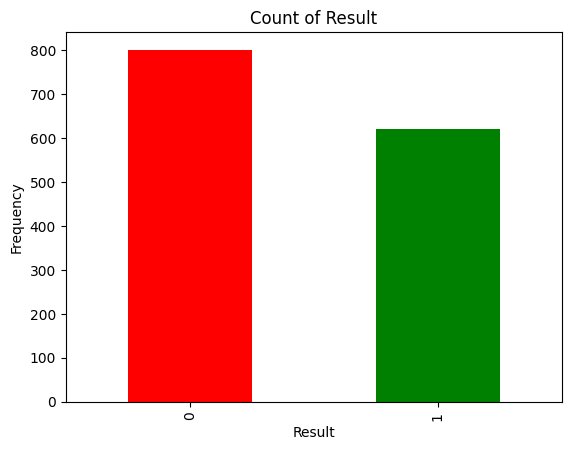

In [15]:
#0-not anemic 1-aenmic
#checking for the count of anemic and not anemic

results=df['Result'].value_counts()
print(results)

results.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.title('Count of Result')
plt.show()

In [16]:
print(df['Gender'].value_counts())

Gender
1    740
0    681
Name: count, dtype: int64


In [20]:
#The female count is more then male count
#Balancing it using the undersampling

from sklearn.utils import resample
majorclass = df[df['Result']==0]
minorclass= df[df['Result']==1]

major_downsample=resample(majorclass, replace=False,n_samples=len(minorclass),random_state=42)

df=pd.concat([major_downsample,minorclass])

print(df['Result'].value_counts())

Result
0    620
1    620
Name: count, dtype: int64


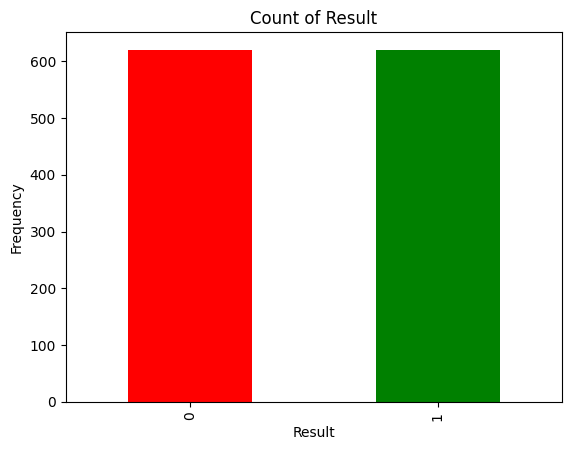

In [21]:
#plotting balanced Gender Count
result_balanced= df['Result'].value_counts()
result_balanced.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.title('Count of Result')
plt.show()
